In [113]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score

# Prediction performance evaluation

In [114]:
df = pd.read_csv('../datafiles/chexpert/chexpert.sample.test.csv')

white = 'White'
asian = 'Asian'
black = 'Black'

# Race Classification

In [115]:
data_dir = '../prediction/chexpert/multitask/densenet-all/'

cnn_pred_race = pd.read_csv(data_dir + 'predictions.test.race.csv')
cnn_pred_disease = pd.read_csv(data_dir + 'predictions.test.disease.csv')
cnn_pred_sex = pd.read_csv(data_dir + 'predictions.test.sex.csv')

In [116]:
preds_race = np.stack([cnn_pred_race['class_0'],cnn_pred_race['class_1'],cnn_pred_race['class_2']]).transpose()
targets_race = np.array(cnn_pred_race['target'])

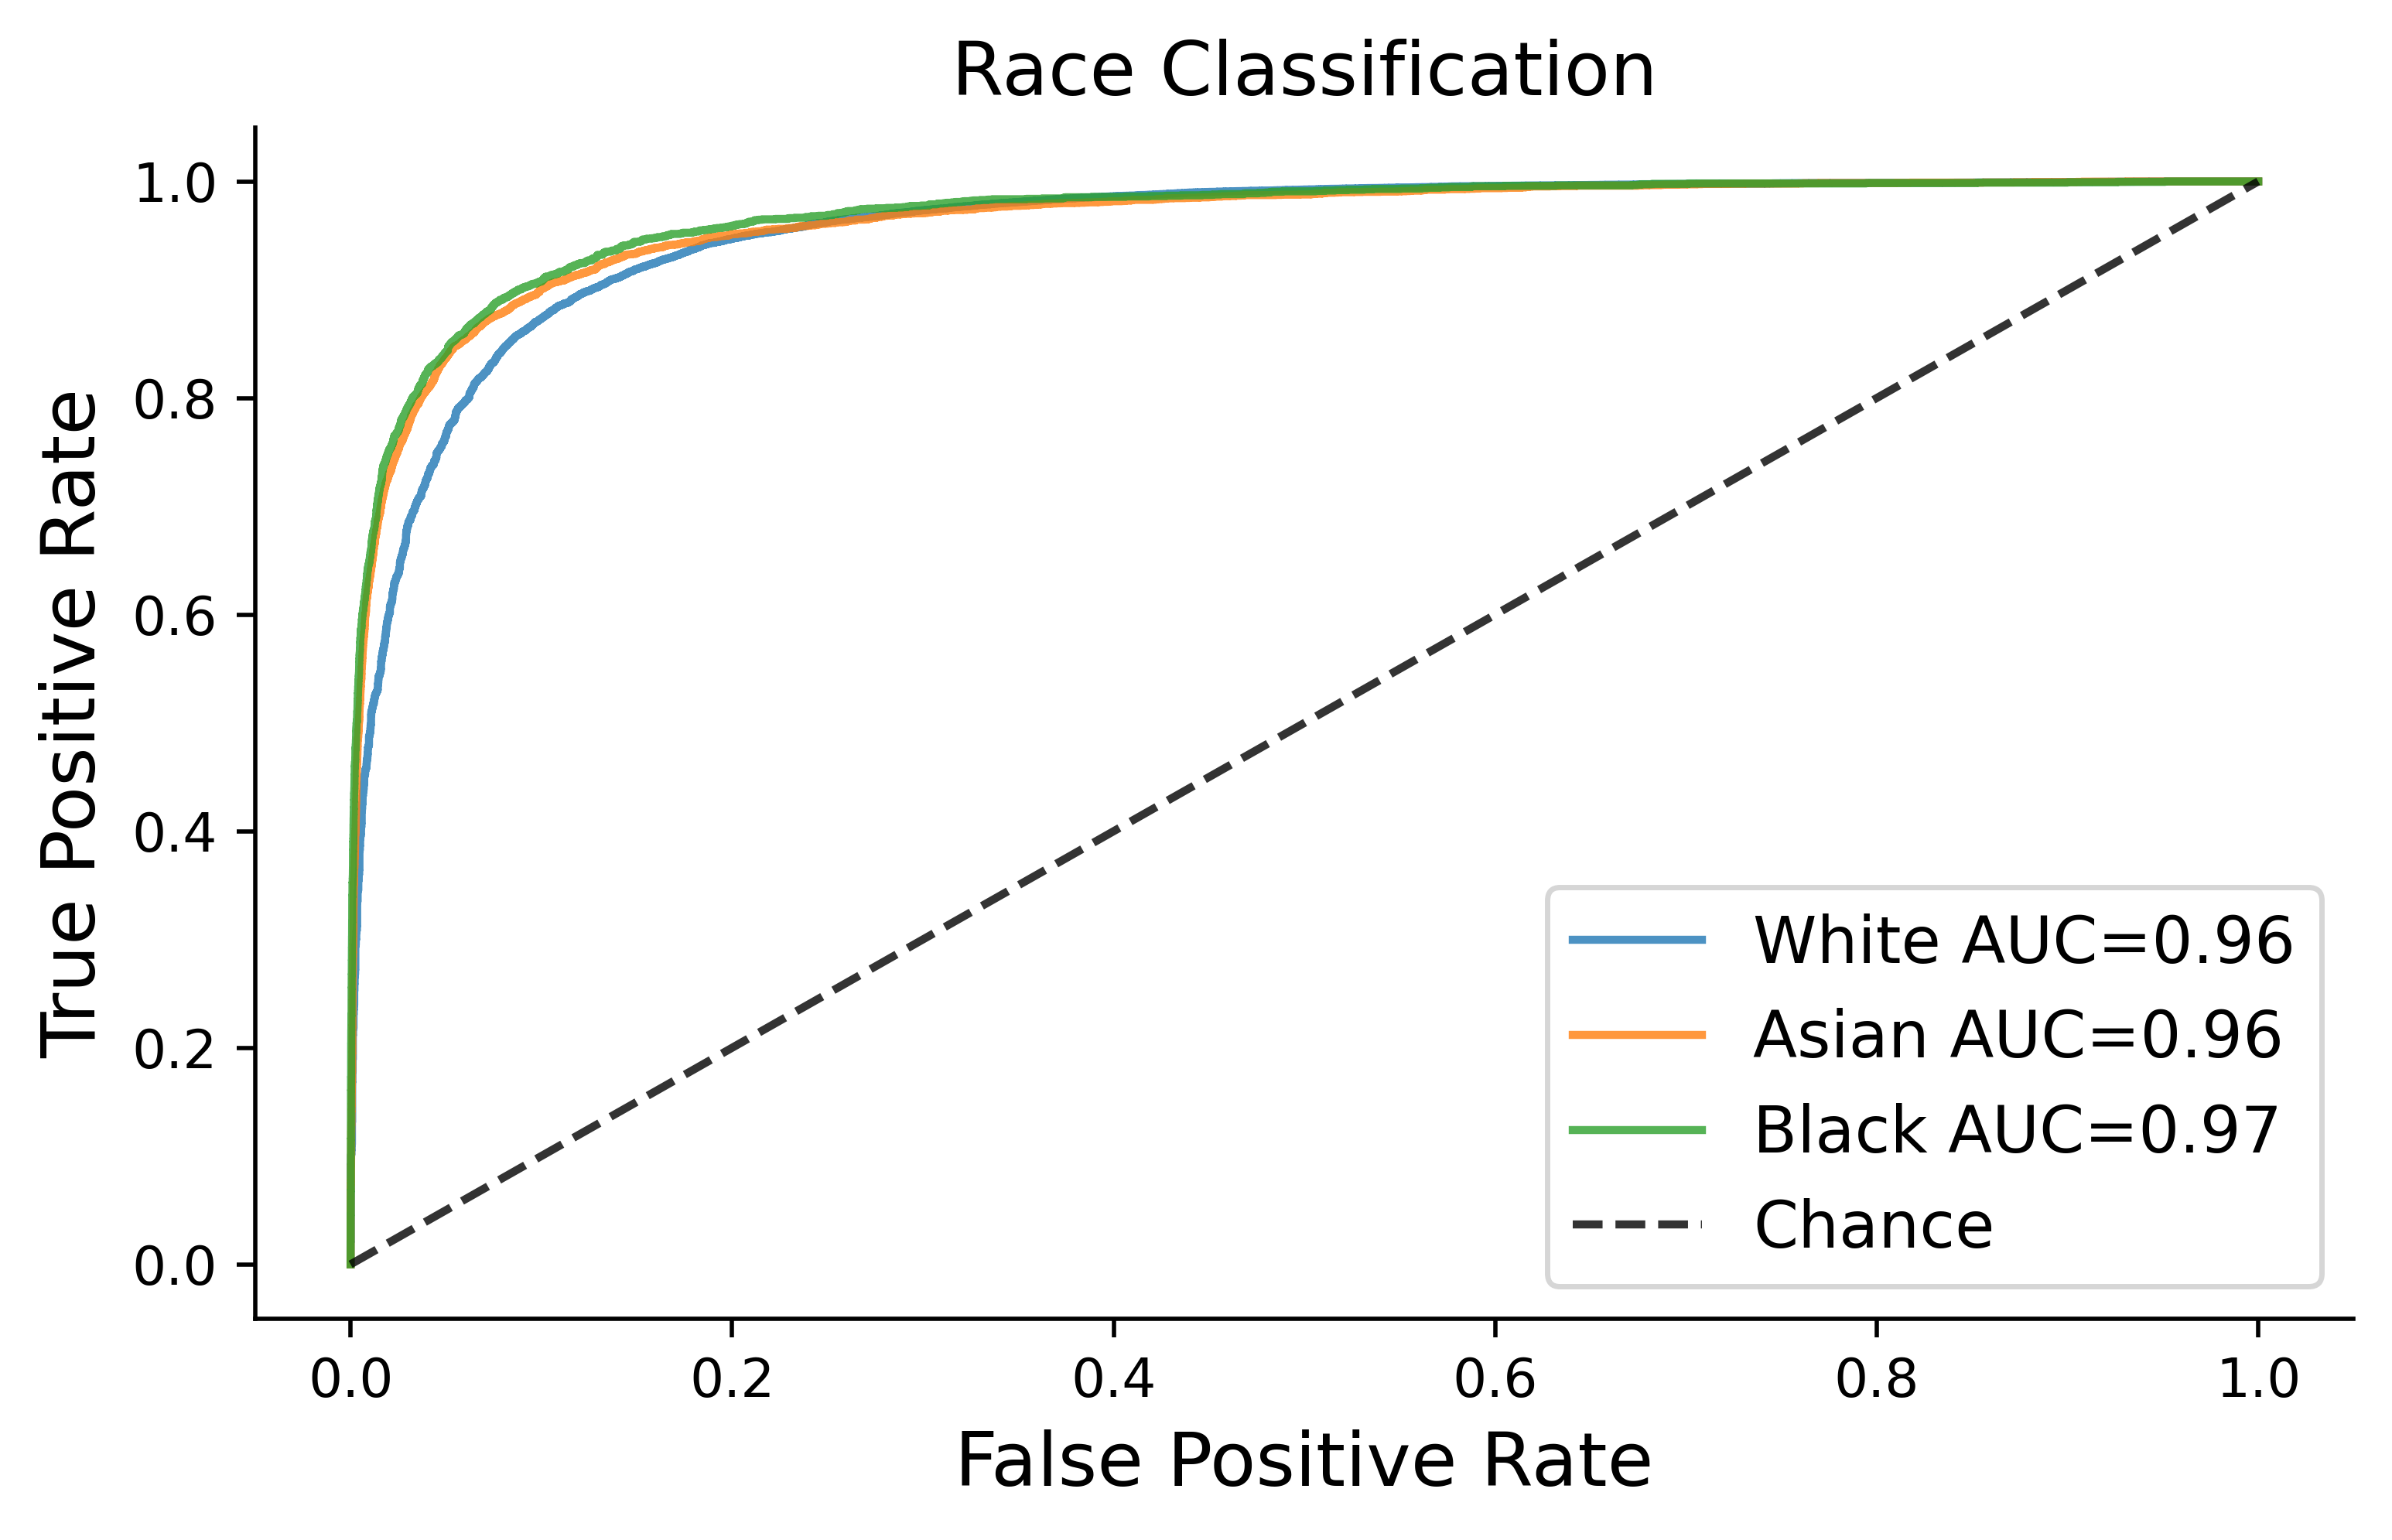

In [117]:
# WHITE
pos_label = 0
y = np.array(targets_race)
y[targets_race != pos_label] = 0
y[targets_race == pos_label] = 1
fpr_w, tpr_w, _ = roc_curve(y, preds_race[:,pos_label])
roc_auc_w = auc(fpr_w, tpr_w)

# ASIAN
pos_label = 1
y = np.array(targets_race)
y[targets_race != pos_label] = 0
y[targets_race == pos_label] = 1
fpr_a, tpr_a, _ = roc_curve(y, preds_race[:,pos_label])
roc_auc_a = auc(fpr_a, tpr_a)

# BLACK
pos_label = 2
y = np.array(targets_race)
y[targets_race != pos_label] = 0
y[targets_race == pos_label] = 1
fpr_b, tpr_b, _ = roc_curve(y, preds_race[:,pos_label])
roc_auc_b = auc(fpr_b, tpr_b)

fig, ax = plt.subplots(figsize=(7,4), dpi=500)
plt.plot(fpr_w, tpr_w, lw=1.5, alpha=.8, label='White AUC=%0.2f' % roc_auc_w)
plt.plot(fpr_a, tpr_a, lw=1.5, alpha=.8, label='Asian AUC=%0.2f' % roc_auc_a)
plt.plot(fpr_b, tpr_b, lw=1.5, alpha=.8, label='Black AUC=%0.2f' % roc_auc_b)
ax.plot([0, 1], [0, 1], linestyle='--', lw=1.5, color='k', label='Chance', alpha=.8)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.title('Race Classification', fontsize=14)
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05])
ax.spines[['right', 'top']].set_visible(False)
plt.show()

# fig.savefig("CNN-race.png", bbox_inches='tight', dpi=300)

# Sex classification

In [118]:
# for subgroup analysis
cnn_pred_sex['race'] = df['race']
cnn_pred_sex_w = cnn_pred_sex[cnn_pred_sex['race'] == white]
cnn_pred_sex_a = cnn_pred_sex[cnn_pred_sex['race'] == asian]
cnn_pred_sex_b = cnn_pred_sex[cnn_pred_sex['race'] == black]

In [119]:
preds_sex = np.stack([cnn_pred_sex_w['class_0'],cnn_pred_sex_w['class_1']]).transpose()
targets_sex = np.array(cnn_pred_sex_w['target'])
fpr_w, tpr_w, _ = roc_curve(targets_sex, preds_sex[:,1])
roc_auc_w = auc(fpr_w, tpr_w)

preds_sex = np.stack([cnn_pred_sex_a['class_0'],cnn_pred_sex_a['class_1']]).transpose()
targets_sex = np.array(cnn_pred_sex_a['target'])
fpr_a, tpr_a, _ = roc_curve(targets_sex, preds_sex[:,1])
roc_auc_a = auc(fpr_a, tpr_a)

preds_sex = np.stack([cnn_pred_sex_b['class_0'],cnn_pred_sex_b['class_1']]).transpose()
targets_sex = np.array(cnn_pred_sex_b['target'])
fpr_b, tpr_b, _ = roc_curve(targets_sex, preds_sex[:,1])
roc_auc_b = auc(fpr_b, tpr_b)


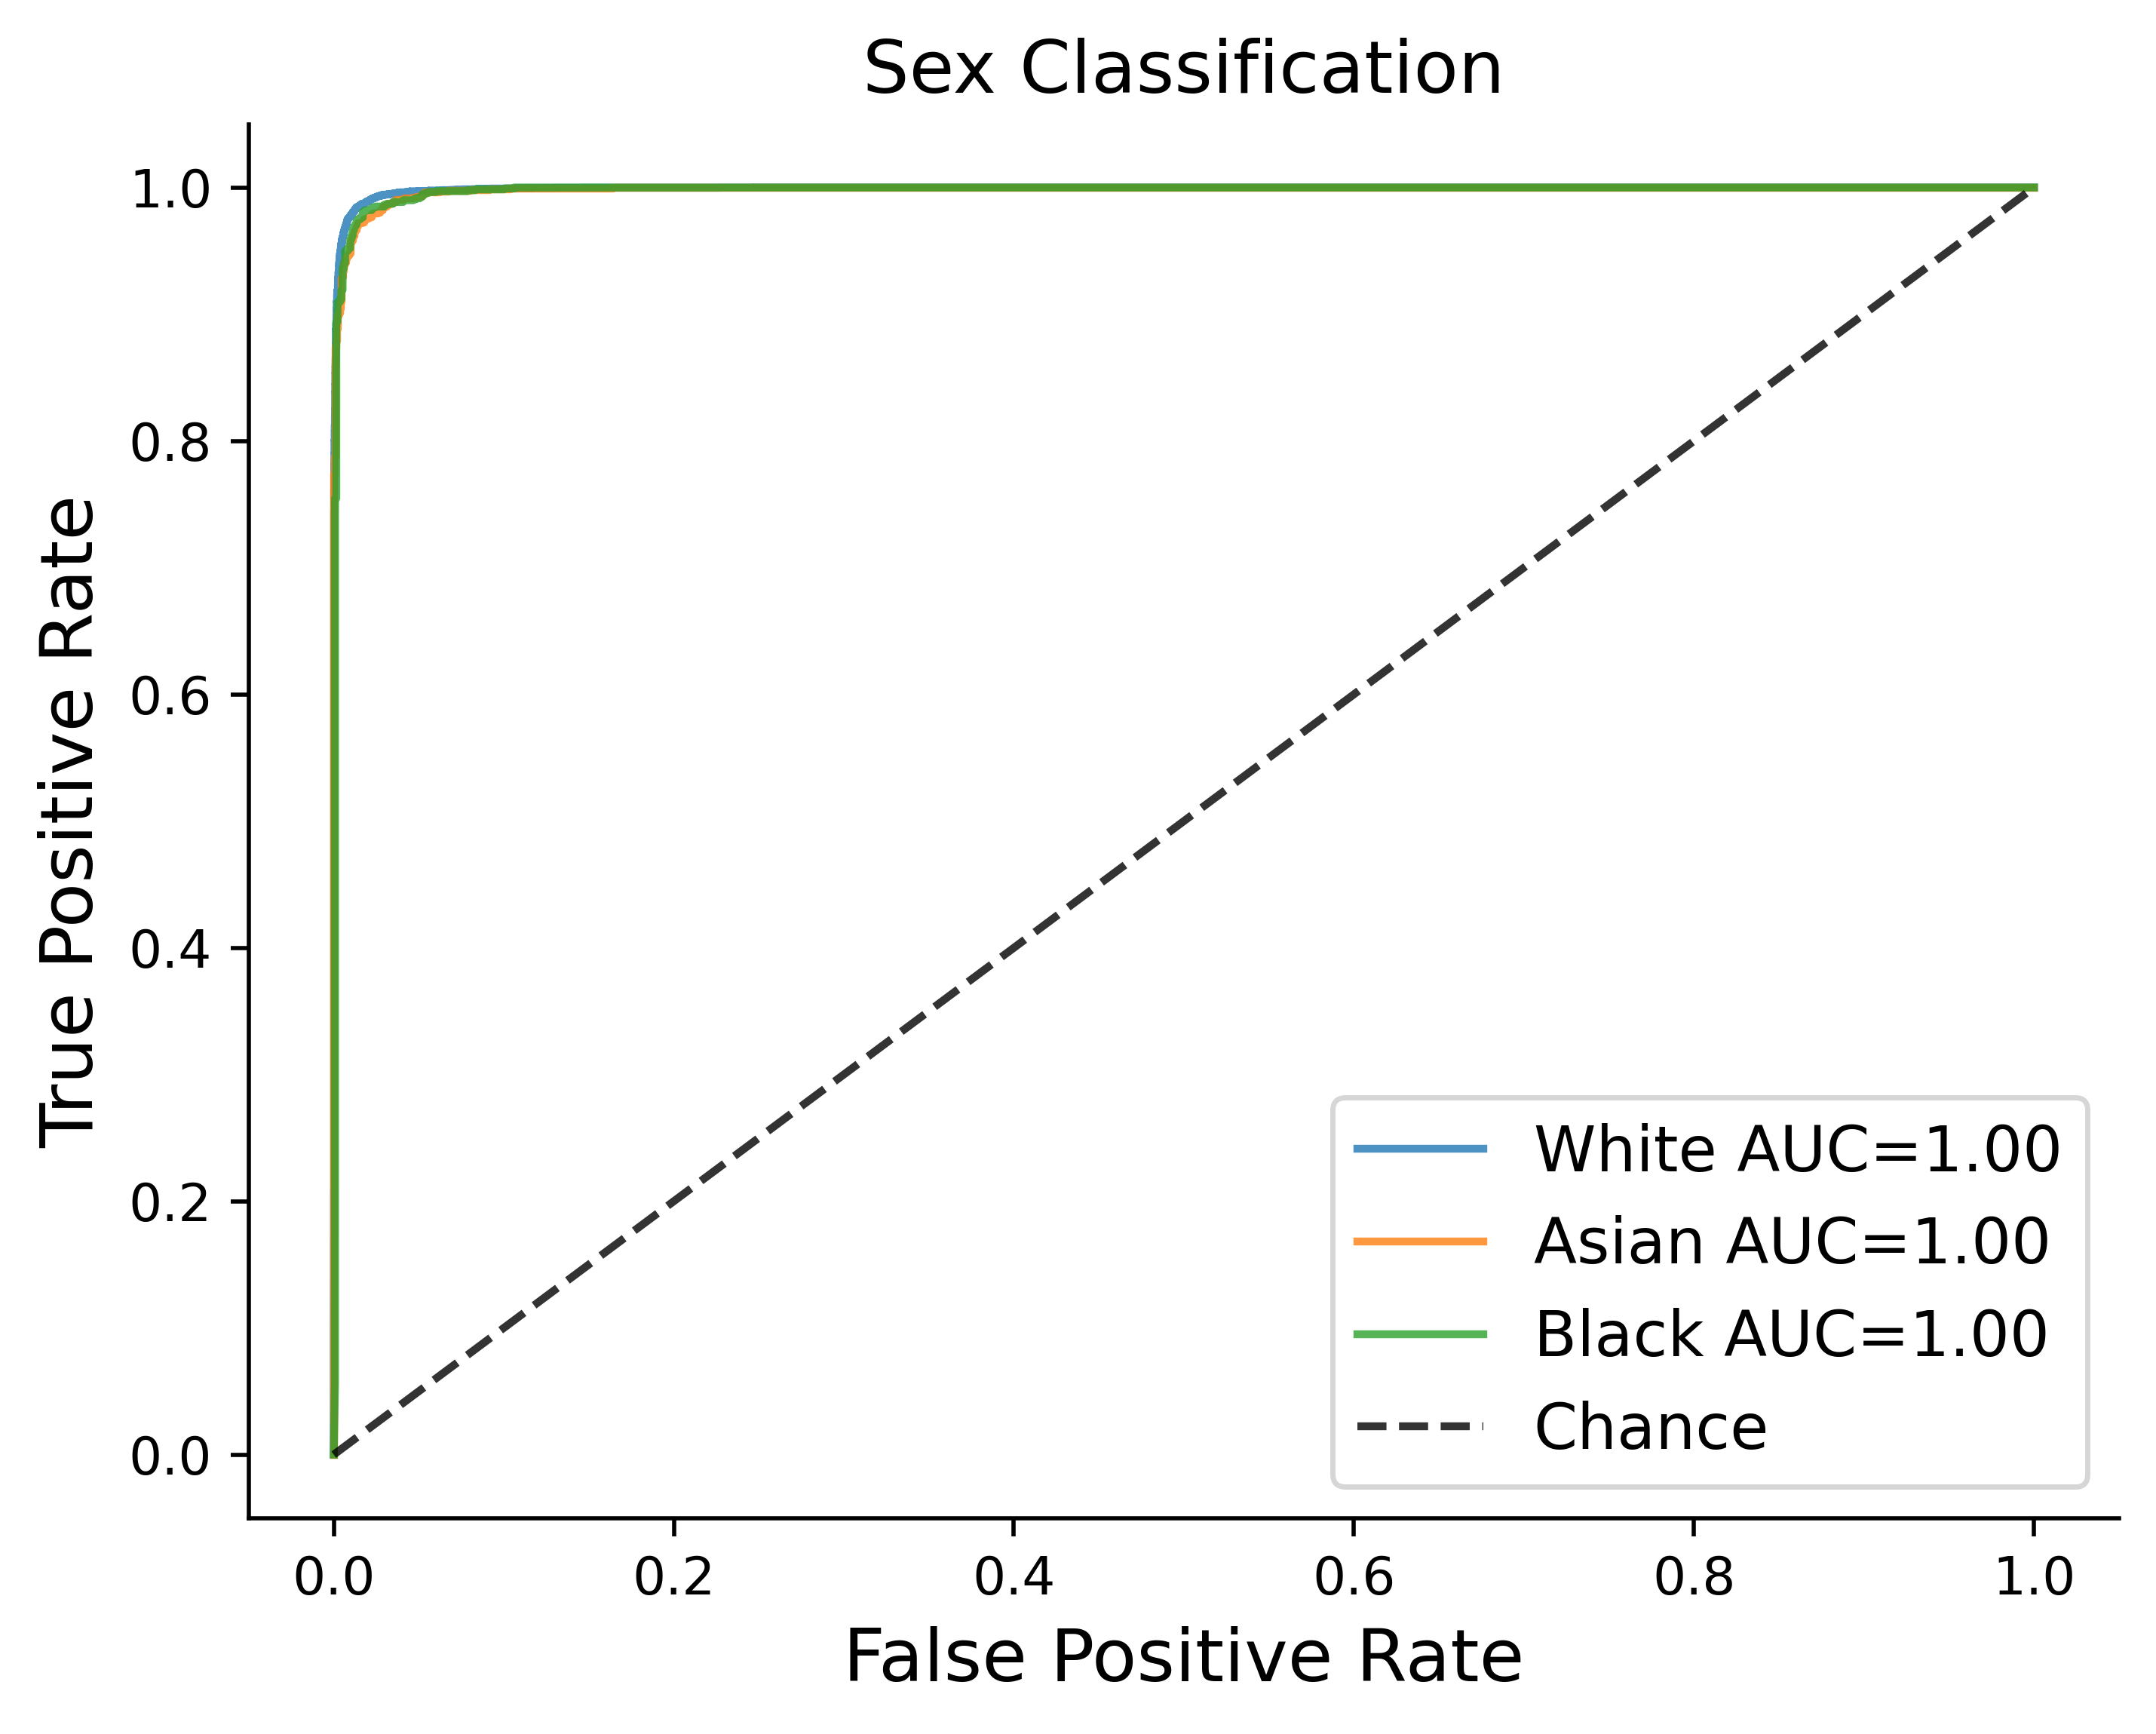

In [120]:
fig, ax = plt.subplots(dpi=500)
plt.plot(fpr_w, tpr_w, lw=1.5, alpha=.8, label='White AUC=%0.2f' % roc_auc_w)
plt.plot(fpr_a, tpr_a, lw=1.5, alpha=.8, label='Asian AUC=%0.2f' % roc_auc_a)
plt.plot(fpr_b, tpr_b, lw=1.5, alpha=.8, label='Black AUC=%0.2f' % roc_auc_b)
ax.plot([0, 1], [0, 1], linestyle='--', lw=1.5, color='k', label='Chance', alpha=.8)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.title('Sex Classification', fontsize=14)
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05])
ax.spines[['right', 'top']].set_visible(False)
# fig.savefig("CNN-sex.png", bbox_inches='tight', dpi=300)

### Disease Classification 

In [121]:
labels = [
    'No Finding',
    'Enlarged Cardiomediastinum',
    'Cardiomegaly',
    'Lung Opacity',
    'Lung Lesion',
    'Edema',
    'Consolidation',
    'Pneumonia',
    'Atelectasis',
    'Pneumothorax',
    'Pleural Effusion',
    'Pleural Other',
    'Fracture',
    'Support Devices']

In [122]:
label = 0    # No finding
label = 10 # Pleural effusion
print(labels[label])

Pleural Effusion


All 	 Threshold 0.1079
All	TPR 0.80 | FPR 0.20 | AUC 0.87
White	TPR 0.79 | FPR 0.20 | AUC 0.87
Asian	TPR 0.81 | FPR 0.19 | AUC 0.88
Black	TPR 0.84 | FPR 0.25 | AUC 0.88
Female	TPR 0.77 | FPR 0.18 | AUC 0.87
Male	TPR 0.82 | FPR 0.22 | AUC 0.88
All 	 Threshold 0.0424
All	TPR 0.48 | FPR 0.20 | AUC 0.71
White	TPR 0.47 | FPR 0.20 | AUC 0.70
Asian	TPR 0.50 | FPR 0.18 | AUC 0.73
Black	TPR 0.59 | FPR 0.25 | AUC 0.77
Female	TPR 0.44 | FPR 0.17 | AUC 0.71
Male	TPR 0.51 | FPR 0.22 | AUC 0.70
All 	 Threshold 0.1112
All	TPR 0.78 | FPR 0.20 | AUC 0.87
White	TPR 0.76 | FPR 0.20 | AUC 0.87
Asian	TPR 0.80 | FPR 0.20 | AUC 0.88
Black	TPR 0.85 | FPR 0.25 | AUC 0.87
Female	TPR 0.79 | FPR 0.20 | AUC 0.88
Male	TPR 0.76 | FPR 0.20 | AUC 0.87
All 	 Threshold 0.6330
All	TPR 0.48 | FPR 0.20 | AUC 0.73
White	TPR 0.48 | FPR 0.20 | AUC 0.73
Asian	TPR 0.52 | FPR 0.23 | AUC 0.73
Black	TPR 0.43 | FPR 0.16 | AUC 0.75
Female	TPR 0.50 | FPR 0.22 | AUC 0.73
Male	TPR 0.47 | FPR 0.19 | AUC 0.73
All 	 Threshold 0.0472
All	T

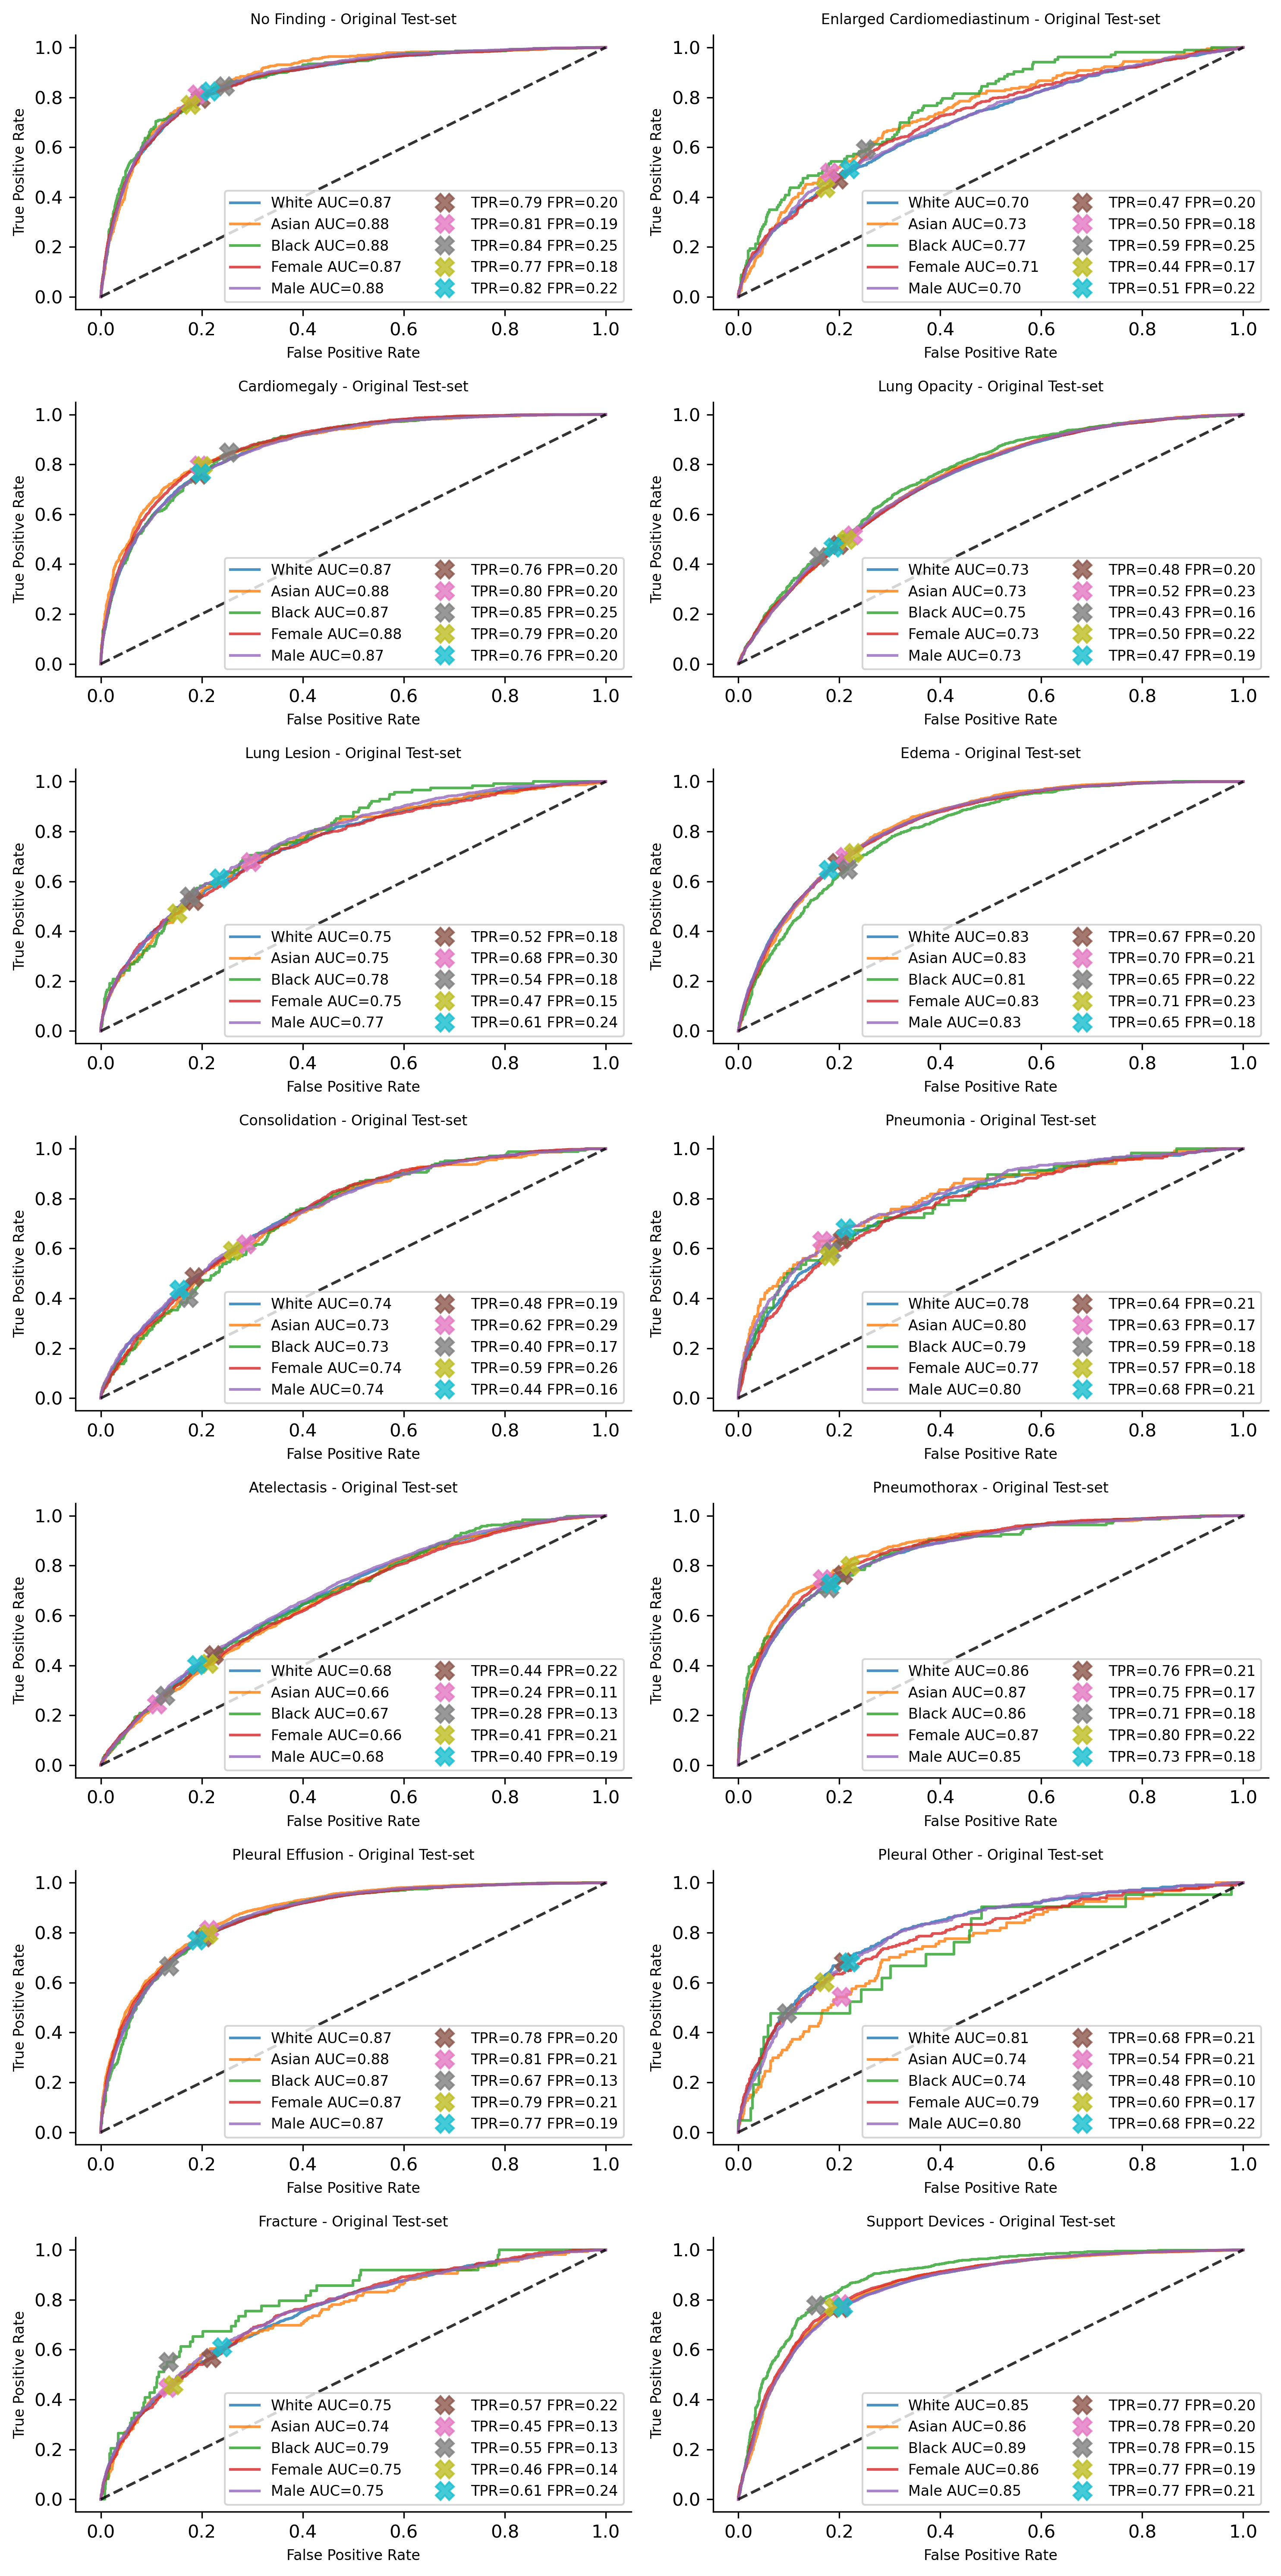

In [20]:
fig, ax = plt.subplots(7, 2, figsize=(10,20), dpi=300)
ax = ax.ravel()


for label, label_name in enumerate(labels):
    cnn_pred_disease['race'] = df['race']
    cnn_pred_disease['sex'] = df['sex']
    cnn_pred_disease['age'] = df['age']
    cnn_pred_disease[label_name] = df[label_name]
    
    # subgroups
    cnn_pred_m = cnn_pred_disease[cnn_pred_disease['sex'] == 'Male'].copy()
    cnn_pred_f = cnn_pred_disease[cnn_pred_disease['sex'] == 'Female'].copy()
    cnn_pred_w = cnn_pred_disease[cnn_pred_disease['race'] == white].copy()
    cnn_pred_a = cnn_pred_disease[cnn_pred_disease['race'] == asian].copy()
    cnn_pred_b = cnn_pred_disease[cnn_pred_disease['race'] == black].copy()

    preds = cnn_pred_disease['class_' + str(label)]
    targets = np.array(cnn_pred_disease['target_' + str(label)])

    preds_m = cnn_pred_m['class_' + str(label)]
    targets_m = np.array(cnn_pred_m['target_' + str(label)])

    preds_f = cnn_pred_f['class_' + str(label)]
    targets_f = np.array(cnn_pred_f['target_' + str(label)])

    preds_w = cnn_pred_w['class_' + str(label)]
    targets_w = np.array(cnn_pred_w['target_' + str(label)])

    preds_a = cnn_pred_a['class_' + str(label)]
    targets_a = np.array(cnn_pred_a['target_' + str(label)])

    preds_b = cnn_pred_b['class_' + str(label)]
    targets_b = np.array(cnn_pred_b['target_' + str(label)])

    target_fpr = 0.2

    fpr, tpr, thres = roc_curve(targets, preds)
    fpr_w, tpr_w, thres_w = roc_curve(targets_w, preds_w)
    fpr_a, tpr_a, thres_a = roc_curve(targets_a, preds_a)
    fpr_b, tpr_b, thres_b = roc_curve(targets_b, preds_b)
    fpr_m, tpr_m, thres_m = roc_curve(targets_m, preds_m)
    fpr_f, tpr_f, thres_f = roc_curve(targets_f, preds_f)

    roc_auc = auc(fpr, tpr)
    roc_auc_w = auc(fpr_w, tpr_w)
    roc_auc_a = auc(fpr_a, tpr_a)
    roc_auc_b = auc(fpr_b, tpr_b)
    roc_auc_m = auc(fpr_m, tpr_m)
    roc_auc_f = auc(fpr_f, tpr_f)

    # global threshold
    op = thres[np.argmin(np.abs(fpr-target_fpr))]

    print('All \t Threshold %0.4f' % op)

    # APPLYING GLOBAL THRESHOLD
    fpr_t = 1 - recall_score(targets, preds>=op, pos_label=0)
    tpr_t = recall_score(targets, preds>=op, pos_label=1)

    fpr_t_w = 1 - recall_score(targets_w, preds_w>=op, pos_label=0)
    tpr_t_w = recall_score(targets_w, preds_w>=op, pos_label=1)

    fpr_t_a = 1 - recall_score(targets_a, preds_a>=op, pos_label=0)
    tpr_t_a = recall_score(targets_a, preds_a>=op, pos_label=1)

    fpr_t_b = 1 - recall_score(targets_b, preds_b>=op, pos_label=0)
    tpr_t_b = recall_score(targets_b, preds_b>=op, pos_label=1)

    fpr_t_f = 1 - recall_score(targets_f, preds_f>=op, pos_label=0)
    tpr_t_f = recall_score(targets_f, preds_f>=op, pos_label=1)

    fpr_t_m = 1 - recall_score(targets_m, preds_m>=op, pos_label=0)
    tpr_t_m = recall_score(targets_m, preds_m>=op, pos_label=1)

    ax[label].plot(fpr_w, tpr_w, lw=1.5, alpha=.8, label='White AUC=%0.2f' % roc_auc_w)
    ax[label].plot(fpr_a, tpr_a, lw=1.5, alpha=.8, label='Asian AUC=%0.2f' % roc_auc_a)
    ax[label].plot(fpr_b, tpr_b, lw=1.5, alpha=.8, label='Black AUC=%0.2f' % roc_auc_b)
    ax[label].plot(fpr_f, tpr_f, lw=1.5, alpha=.8, label='Female AUC=%0.2f' % roc_auc_f)
    ax[label].plot(fpr_m, tpr_m, lw=1.5, alpha=.8, label='Male AUC=%0.2f' % roc_auc_m)

    #ax[label].gca().set_prop_cycle(None)

    ax[label].plot(fpr_t_w, tpr_t_w, 'X', alpha=.8, markersize=10, label='TPR=%0.2f FPR=%0.2f' % (tpr_t_w,fpr_t_w))
    ax[label].plot(fpr_t_a, tpr_t_a, 'X', alpha=.8, markersize=10, label='TPR=%0.2f FPR=%0.2f' % (tpr_t_a,fpr_t_a))
    ax[label].plot(fpr_t_b, tpr_t_b, 'X', alpha=.8, markersize=10, label='TPR=%0.2f FPR=%0.2f' % (tpr_t_b,fpr_t_b))
    ax[label].plot(fpr_t_f, tpr_t_f, 'X', alpha=.8, markersize=10, label='TPR=%0.2f FPR=%0.2f' % (tpr_t_f,fpr_t_f))
    ax[label].plot(fpr_t_m, tpr_t_m, 'X', alpha=.8, markersize=10, label='TPR=%0.2f FPR=%0.2f' % (tpr_t_m,fpr_t_m))

    ax[label].legend(loc="lower right", fontsize=8, ncol=2)
    title = labels[label] + ' - Original Test-set'
    ax[label].plot([0, 1], [0, 1], linestyle='--', lw=1.5, color='k', label='Chance', alpha=.8)
    ax[label].set_xlabel('False Positive Rate', fontsize=8)
    ax[label].set_ylabel('True Positive Rate', fontsize=8)
    ax[label].set_title(title, fontsize=8)
    ax[label].set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05])
    ax[label].spines[['right', 'top']].set_visible(False)
    #plt.show()
    # fig.savefig(title + '.png', bbox_inches='tight', dpi=300)

    print('All\tTPR %0.2f | FPR %0.2f | AUC %0.2f' % (tpr_t,fpr_t,roc_auc))
    print('White\tTPR %0.2f | FPR %0.2f | AUC %0.2f' % (tpr_t_w,fpr_t_w,roc_auc_w))
    print('Asian\tTPR %0.2f | FPR %0.2f | AUC %0.2f' % (tpr_t_a,fpr_t_a,roc_auc_a))
    print('Black\tTPR %0.2f | FPR %0.2f | AUC %0.2f' % (tpr_t_b,fpr_t_b,roc_auc_b))
    print('Female\tTPR %0.2f | FPR %0.2f | AUC %0.2f' % (tpr_t_f,fpr_t_f,roc_auc_f))
    print('Male\tTPR %0.2f | FPR %0.2f | AUC %0.2f' % (tpr_t_m,fpr_t_m,roc_auc_m))

plt.tight_layout()
plt.show()